In [1]:
generate_data = True

In [1]:
import numpy as np
import run_continuum as run
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.signal
import scipy as scp
import scipy.io as sio

import warnings
warnings.filterwarnings('ignore')

from frictionlaws import SlipWeakeningFrictionLaw
from predictions import *

0
1
2
3


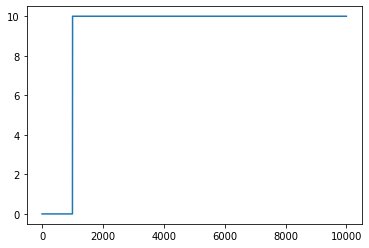

In [4]:
# Crack fracture energy arrest:
dt = 1e-3
tmax = 200
gamma = 0.0
beta = 1e-3
output_interval = 100
dataBarrier = []
x_barrier = 10
x = np.linspace(0,100,10000)
dx = x[1]

tau_all = np.logspace(-2,-.01,4)
dc_all = np.logspace(-2,1,4)
L_arrest = np.zeros([np.size(tau_all),np.size(dc_all)])

for i in range(np.size(tau_all)):
    print(i)
    for j in range(np.size(dc_all)):

        tau = gauss(x,0,.1)*(1-tau_all[i]) + tau_all[i]
        tau[0]=1
        dc = (dc_all[j]-1e-10)*gauss(x,x_barrier,.001) + 1e-10
        dc[x>=x_barrier]=dc_all[j]
        
        # run
        data = run.run_continuum(x = x, tau = tau, tau_minus = tau+2, dt = dt, output_interval = output_interval, gamma = gamma, tmax = tmax, beta = beta, bc='fixed',frictionLaw = SlipWeakeningFrictionLaw(dc=dc,delta_u = np.zeros(np.size(x))))

        # Find L_arrest
        try:
            L_arrest[i,j] = np.max(x[np.sum(1-data['stuck'],1)>0])
        except:
            L_arrest[i,j]=np.max(x)

In [7]:
tau_all_pred = np.logspace(-2,-.01,25)
dc_all_pred = np.logspace(-2,1,25)
L_arrest_pred = np.zeros([np.size(tau_all_pred),np.size(dc_all_pred)])
x_barrier_pred = 40

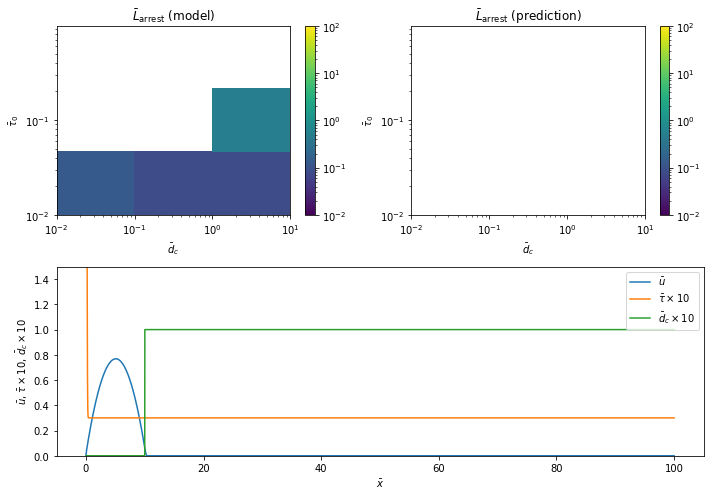

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
L = L_arrest-x_barrier
L[L_arrest>=(np.max(x)-x_barrier-1)]=-1
plt.pcolormesh(dc_all,tau_all,L,norm=colors.LogNorm(vmin=1e-2, vmax=100))
plt.colorbar()
#plt.plot(dc_all,(dc_all*gamma)**0.5,'r')
plt.yscale('log')
plt.xscale('log')
plt.title('$\\bar L_\mathrm{arrest}$ (model)')
plt.xlabel('$\\bar d_c$')
plt.ylabel('$\\bar \\tau_0$')

dc_p = np.logspace(-2,1,1000)

plt.subplot(2,2,2)
L = L_arrest_pred-x_barrier_pred
L[L_arrest_pred>=(np.max(x_pred)-x_barrier_pred)]=-1
plt.pcolormesh(dc_all_pred,tau_all_pred,L,norm=colors.LogNorm(vmin=1e-2, vmax=100))
plt.colorbar()
plt.yscale('log')
plt.xscale('log')
plt.title('$\\bar L_\mathrm{arrest}$ (prediction)')
plt.xlabel('$\\bar d_c$')
plt.ylabel('$\\bar \\tau_0$')

dc_p = np.logspace(-2,1,1000)


plt.subplot(2,2,(3,4))

tau = gauss(x,0,.1)*(1-3e-2) + 3e-2
tau[0]=1
dc = (.1-1e-10)*gauss(x,x_barrier,.001) + 1e-10
dc[x>=x_barrier]=.1
data_plot = run.run_continuum(x = x,
                              tau = tau,
                              tau_minus = tau+2,
                              dt = dt,
                              output_interval = output_interval,
                              gamma = gamma,
                              tmax = tmax,
                              beta = beta,
                              bc='fixed',
                              frictionLaw = SlipWeakeningFrictionLaw(dc=dc,delta_u = np.zeros(np.size(x))))

plt.plot(x,data_plot['u'][:,-1], label = '$\\bar u$')
plt.plot(x,tau*10, label = '$\\bar \\tau \\times 10$')
plt.plot(x,dc*10, label = '$\\bar d_c \\times 10$')
plt.xlabel('$\\bar x$')
plt.ylabel('$\\bar u$, $\\bar \\tau \\times 10$, $\\bar d_c \\times 10$')
plt.legend()
plt.ylim([0,1.5])
#plt.show()


plt.tight_layout()